# word2vec (CBOW)

In [1]:
import numpy as np 
import torch 
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt 

## 1.Load data

### corpus data from wiki 

In [2]:
corpus = ["An orange is fruit that has sour taste and rough skin", 
          "A mango is fruit that has sweet taste and smooth skin", 
          "A grape is fruit that has sweet taste and smooth skin", 
          "The cat is animal that live in home and like to eat rat", 
          "Fish is animal that live in the sea or river, it can breath under the water", 
          "Rat is animal that live in everywhere, it like to eat trash"]
          

## 2.Tokenized

In [3]:
corpus_tokenized = [sent.split(" ") for sent in corpus]

In [4]:
flatten = lambda l: [item for sublist in l for item in sublist]
flattened_corpus = flatten(corpus_tokenized)

In [7]:
vocabs = list(set(flattened_corpus))
vocabs

['mango',
 'Fish',
 'live',
 'eat',
 'under',
 'the',
 'to',
 'animal',
 'everywhere,',
 'taste',
 'has',
 'river,',
 'The',
 'sea',
 'it',
 'An',
 'trash',
 'cat',
 'orange',
 'grape',
 'skin',
 'like',
 'or',
 'breath',
 'sweet',
 'in',
 'that',
 'can',
 'water',
 'sour',
 'is',
 'rat',
 'A',
 'and',
 'rough',
 'fruit',
 'smooth',
 'Rat',
 'home']

## 3.Numerization

In [8]:
word_2_idx = {v: idx for idx, v in enumerate(vocabs)}

In [9]:
word_2_idx["rat"]
len(word_2_idx)

39

In [10]:
vocabs.append('<UNK>')
word_2_idx['<UNK>'] = 39 

In [13]:
word_2_idx

{'mango': 0,
 'Fish': 1,
 'live': 2,
 'eat': 3,
 'under': 4,
 'the': 5,
 'to': 6,
 'animal': 7,
 'everywhere,': 8,
 'taste': 9,
 'has': 10,
 'river,': 11,
 'The': 12,
 'sea': 13,
 'it': 14,
 'An': 15,
 'trash': 16,
 'cat': 17,
 'orange': 18,
 'grape': 19,
 'skin': 20,
 'like': 21,
 'or': 22,
 'breath': 23,
 'sweet': 24,
 'in': 25,
 'that': 26,
 'can': 27,
 'water': 28,
 'sour': 29,
 'is': 30,
 'rat': 31,
 'A': 32,
 'and': 33,
 'rough': 34,
 'fruit': 35,
 'smooth': 36,
 'Rat': 37,
 'home': 38,
 '<UNK>': 39}

In [14]:
index2word = {v:k for k, v in word_2_idx.items()}

index2word

{0: 'mango',
 1: 'Fish',
 2: 'live',
 3: 'eat',
 4: 'under',
 5: 'the',
 6: 'to',
 7: 'animal',
 8: 'everywhere,',
 9: 'taste',
 10: 'has',
 11: 'river,',
 12: 'The',
 13: 'sea',
 14: 'it',
 15: 'An',
 16: 'trash',
 17: 'cat',
 18: 'orange',
 19: 'grape',
 20: 'skin',
 21: 'like',
 22: 'or',
 23: 'breath',
 24: 'sweet',
 25: 'in',
 26: 'that',
 27: 'can',
 28: 'water',
 29: 'sour',
 30: 'is',
 31: 'rat',
 32: 'A',
 33: 'and',
 34: 'rough',
 35: 'fruit',
 36: 'smooth',
 37: 'Rat',
 38: 'home',
 39: '<UNK>'}

## 2.Prepare data

### test function

In [ ]:
skipgrams = []

for sent in corpus_tokenized :
    # print()
    for i in range(2, len(sent) - 2): #start from 1 to second last
        center_word = sent[i]
        outside_words = [word_2_idx[sent[i-2]], word_2_idx[sent[i-1]], word_2_idx[sent[i+1]], word_2_idx[sent[i+2]]]  #window_size = 1
        for o in outside_words:
            skipgrams.append([center_word, o])

skipgrams
    

In [ ]:
CBOW = []

    #for each corpus
for sent in corpus_tokenized:
    #for each sent ["apple", "banana", "fruit"]
    for i in range(2, len(sent) - 2): #start from 2 to second last
        center_word = word_2_idx[sent[i]]
        outside_words = [word_2_idx[sent[i-2]], word_2_idx[sent[i-1]], word_2_idx[sent[i+1]], word_2_idx[sent[i+2]]]  #window_size = 2
        for o in outside_words:
            CBOW.append([o , center_word])
print(CBOW)     

### real function

In [742]:
def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent ["apple", "banana", "fruit"]
        for i in range(2, len(sent) - 2): #start from 1 to second last
            center_word = word_2_idx[sent[i]]
            outside_words = [word_2_idx[sent[i-2]], word_2_idx[sent[i-1]], word_2_idx[sent[i+1]], word_2_idx[sent[i-2]]]  #window_size = 1
            for o in outside_words:
                skipgrams.append([center_word, o])
    # print(skipgrams)
    # print(skipgrams)            
    #only get a batch, not the entire list
    random_inputs, random_labels = [], []   
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [715]:
def random_batch(batch_size, word_sequence):
    
    # Make skip gram of one size window
    skip_grams = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus:
        for i in range(1, len(sent) - 1):
            target = word_2_idx[sent[i]]
            context = [word_2_idx[sent[i - 1]], word_2_idx[sent[i + 1]]]
            for w in context:
                skip_grams.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams[i][1]])  # context word, e.g., 3
            
    return np.array(random_inputs), np.array(random_labels)

#### remake CBOW

In [15]:
def random_batch(batch_size, corpus):
    
    CBOW_data = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent ["apple", "banana", "fruit"]
        for i in range(2, len(sent) - 2): #start from 1 to second last
            center_word = word_2_idx[sent[i]]
            outside_words = [word_2_idx[sent[i-2]], word_2_idx[sent[i-1]], word_2_idx[sent[i+1]], word_2_idx[sent[i-2]]]  #window_size = 1
            for o in outside_words:
                CBOW_data.append([o, center_word])
    # print(CBOW_data)
    # print(skipgrams)            
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(CBOW_data)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([CBOW_data[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([CBOW_data[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [ ]:
def random_batch(batch_size, corpus):
    cbow_data = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent ["apple", "banana", "fruit"]
        for i in range(2, len(sent) - 2): #start from 2 to second last
            center_word = word_2_idx[sent[i]]
            outside_words = [word_2_idx[sent[i-2]], word_2_idx[sent[i-1]], word_2_idx[sent[i+1]], word_2_idx[sent[i+2]]]  #window_size = 2
            cbow_data.append((outside_words, center_word))
    print(cbow_data)            
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(cbow_data)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append(cbow_data[index][0])  #outside words, this will be a shape of (4, ) --> (4, 1) for modeling
        random_labels.append(cbow_data[index][1])
        
    return np.array(random_inputs), np.array(random_labels)

In [16]:
input, label = random_batch(2, corpus_tokenized)
# print(random_batch(10, corpus_tokenized))
print(f"{input.shape}")
print(f"{label=}")

(2, 1)
label=array([[26],
       [ 7]])


## 3.Model

In [17]:
voc_size = len(vocabs)

In [18]:
voc_size

40

In [19]:
vocabs

['mango',
 'Fish',
 'live',
 'eat',
 'under',
 'the',
 'to',
 'animal',
 'everywhere,',
 'taste',
 'has',
 'river,',
 'The',
 'sea',
 'it',
 'An',
 'trash',
 'cat',
 'orange',
 'grape',
 'skin',
 'like',
 'or',
 'breath',
 'sweet',
 'in',
 'that',
 'can',
 'water',
 'sour',
 'is',
 'rat',
 'A',
 'and',
 'rough',
 'fruit',
 'smooth',
 'Rat',
 'home',
 '<UNK>']

In [27]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [20]:
class CBOW(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(CBOW, self).__init__()
        self.embedding = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
    
    def forward(self, outside_words, center_word):
        #outside_words: (batch_size, window_size*2, 1)
        #center_word: (batch_size, 1)
        
        outside_words_embed = self.embedding(outside_words.squeeze())    #(batch_size, window_size*2, emb_size)
        center_word_embed = self.embedding(center_word)        #(batch_size, 1, emb_size)
        
        #sum up the embeddings of context words
        outside_words_embed_sum = torch.sum(outside_words_embed, 1) #(batch_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = center_word_embed.bmm(outside_words_embed_sum.unsqueeze(2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp))
        #(batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [21]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word_2_idx).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 40])

In [22]:
input, label = random_batch(batch_size, corpus_tokenized)
input #center word

array([[33],
       [26]])

In [28]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = Skipgram(voc_size, emb_size)

In [24]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = CBOW(voc_size, emb_size)

In [29]:
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [30]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [31]:
loss

tensor(3.6310, grad_fn=<NegBackward0>)

In [32]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = Skipgram(voc_size, emb_size)

criterion  = nn.CrossEntropyLoss()  #-log
optimizer  = optim.Adam(model.parameters(), lr=0.0009)

In [33]:
num_epochs = 7000
#for epoch
for epoch in range(num_epochs):

    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1000 | Loss: 3.502455 | Time: ??
Epoch 2000 | Loss: 2.886886 | Time: ??
Epoch 3000 | Loss: 1.346872 | Time: ??
Epoch 4000 | Loss: 3.091658 | Time: ??
Epoch 5000 | Loss: 1.583554 | Time: ??
Epoch 6000 | Loss: 4.813123 | Time: ??
Epoch 7000 | Loss: 1.397553 | Time: ??


In [34]:
def get_embed(word):
    try:
        index = word_2_idx[word]
    except:
        index = word_2_idx['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()


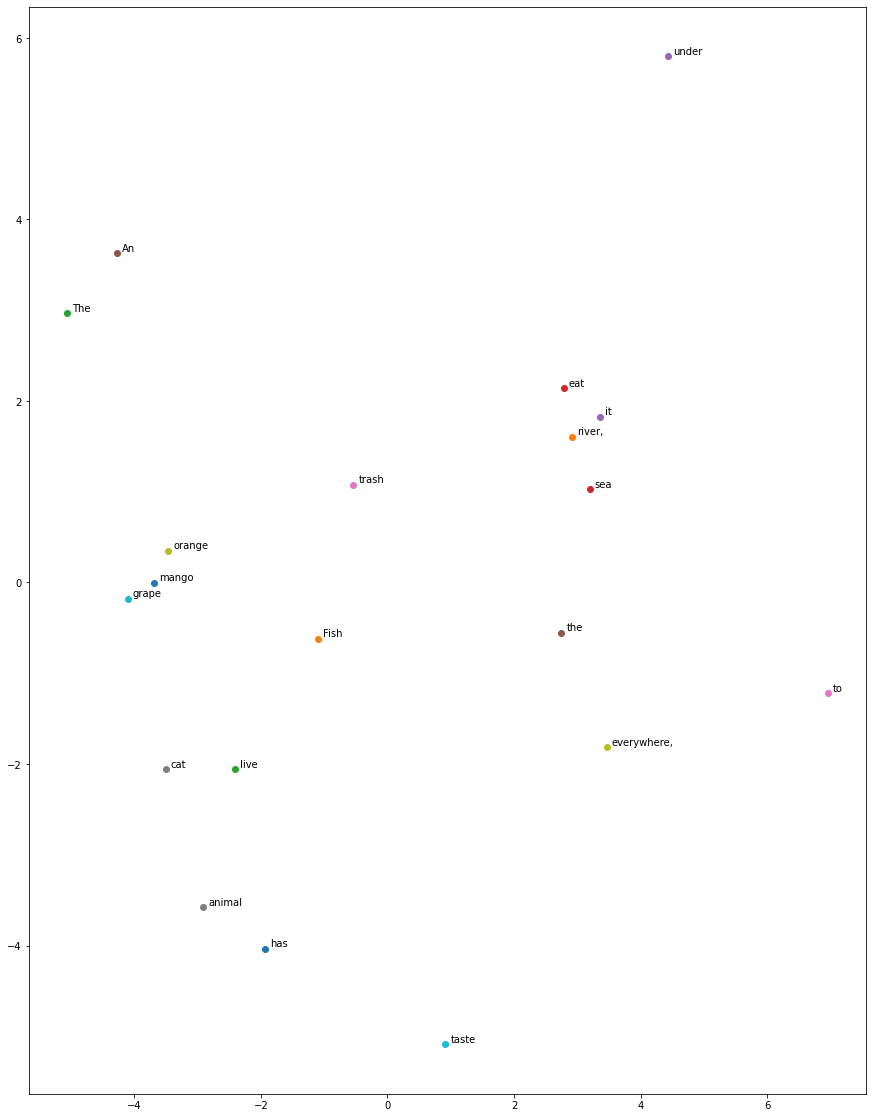

In [35]:
plt.figure(figsize=(15,20))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Similarity test

In [666]:
cat          = get_embed('cat')

smooth        = get_embed('smooth')
mango = get_embed('mango')
animal       = get_embed('animal')

In [38]:
def test_senario(a1 , a2) :
    tester1 = get_embed(a1)
    teater2 = get_embed(a2)
    print(f"{a1} vs {a2} = {cos_sim(tester1 , teater2)}")

In [667]:
cat

(4.341585636138916, 2.1411867141723633)

In [37]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
    
# print(f"cat vs. smooth: ",        cos_sim(cat, smooth))
# print(f"mango vs. animal: ",       cos_sim(mango, animal))
# print(f"mango vs. smooth: ",       cos_sim(mango, smooth))
# print(f"cat vs. cat: ",          cos_sim(cat, cat))

In [43]:
test_senario("cat","fruit")

cat vs fruit = 0.9953290568145609
